# 读取所有对比结果

In [1]:
from sklearn.metrics import mean_squared_error, r2_score
from HaiYangData import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
years = ['2019','2020']
months = ['04','05','06','07','08','09']
output_dir = r'E:\\HLCourse\\experiment_marine_technology\\finally_project\\output_25km\\'
dataframe_dir = r'E:\\HLCourse\\experiment_marine_technology\\finally_project\\dataframe_25km\\'

resolution = 25000

In [3]:
# 将WGS 84坐标（4326）转化为极射投影
crs = CRS.from_epsg(4326)
crs = CRS.from_string("epsg:4326")
crs = CRS.from_proj4("+proj=latlon")
crs = CRS.from_user_input(4326)
crs2 = CRS(proj="aeqd")

transformer = HaiYangData.set_transformer(crs,crs2)
transformer_back = HaiYangData.set_transformer(crs2,crs)

In [4]:
def polar_plot(x_map, y_map,grid, vmax ,vmin,color_lable=None,title=None,cmap = plt.cm.jet):
    m = Basemap(projection='npaeqd', boundinglat=66, lon_0=0, resolution='c')
    m.pcolormesh(x_map, y_map, data=grid, cmap=cmap,vmin=vmin, vmax=vmax,latlon = True)
    cb = m.colorbar(location='bottom')
    if color_lable:
        cb.set_label(color_lable)
    m.fillcontinents()
    m.drawmapboundary()
    m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])
    plt.title(title)


# 读取处理HY2/ALT&Cryosat2/SIRAL SWH对比结果

In [22]:
hy_cy_swh_files = glob.glob(dataframe_dir + 'HY&CY swh*.csv')
hy_cy_swh_files.sort()

In [23]:
hy_cy_swh_df= pd.DataFrame(columns = ['ij','hy_time_round','other_time_round','hy_time','hy_value','other_time','other_value','diff'])
for f in hy_cy_swh_files:
    hy_cy_swh_df = pd.concat([hy_cy_swh_df,(pd.read_csv(f))])


In [24]:
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['hy_value'] < 0].index)
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['other_value'] < 0].index)


In [25]:
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['hy_value'] > 20].index)
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['other_value'] > 20].index)


hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['diff'] > hy_cy_swh_df['diff'].std() * 5 ].index)
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['diff'] < np.negative(hy_cy_swh_df['diff'].std() * 5) ].index)

plt.figure(figsize=(6, 6))
plt.scatter(hy_cy_swh_df['hy_value'], hy_cy_swh_df['other_value'], marker='.')
plt.plot(np.linspace(0,6),np.linspace(0,6),color='r')
x_tick = range(0,7,1)
plt.xticks(x_tick)
plt.yticks(x_tick)
plt.xlim(0,6)
plt.ylim(0,6)
plt.grid(True)
plt.text(4, 2.8, 'Bias = '+str(round(hy_cy_swh_df['diff'].mean(), 3)))
plt.text(4, 2.6, 'STD = '+str(round(hy_cy_swh_df['diff'].std(), 3)))
plt.text(4,2.4,'Sample# = ' + str(hy_cy_swh_df.shape[0]))
plt.text(4,3,'RMSE = ' + str(round(np.sqrt(mean_squared_error(hy_cy_swh_df['hy_value'], hy_cy_swh_df['other_value'])),3)))

plt.xlabel('HY2B ' + 'swh' + '(m)')
plt.ylabel('CRYOSAT2 ' + 'swh' + '(m)')
# plt.title('HY & IS SWH '+str(years[0]) + str(months[0]) )

# plt.savefig(r'output/'+'2019-2020' +  str(months) +'HY & IS' + 'swh' +' '+ 'scatter_plot.jpg')
# plt.savefig(r'output/'+ str( years) + str(months)  +'HY & IS' + 'swh' +' '+ 'scatter_plot.jpg')

hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['hy_value'] < 0].index)
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['other_value'] < 0].index)


In [26]:
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['diff'] > hy_cy_swh_df['diff'].std() * 3 ].index)
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['diff'] < np.negative(hy_cy_swh_df['diff'].std() * 3) ].index)


In [27]:
hy_cy_swh_df.shape

(497, 8)

In [29]:
from matplotlib.colors import LogNorm

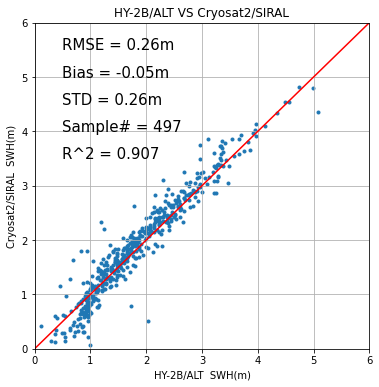

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(hy_cy_swh_df['hy_value'], hy_cy_swh_df['other_value'], marker='.')
# plt.hist2d(hy_cy_swh_df['hy_value'], hy_cy_swh_df['other_value'],bins = 10,cmin = 1,cmap = plt.cm.jet)
plt.plot(np.linspace(0,6),np.linspace(0,6),color='r')
x_tick = range(0,7,1)
plt.xticks(x_tick)
plt.yticks(x_tick)
plt.xlim(0,6)
plt.ylim(0,6)
plt.grid(True)
plt.text(0.5, 5.5,'RMSE = ' + str(round(np.sqrt(mean_squared_error(hy_cy_swh_df['hy_value'], hy_cy_swh_df['other_value'])),2))+ 'm',size = 15)
plt.text(0.5, 5, 'Bias = '+str(round(hy_cy_swh_df['diff'].mean(), 2)) + 'm' ,size = 15)
plt.text(0.5, 4.5, 'STD = '+str(round(hy_cy_swh_df['diff'].std(), 2))+ 'm',size = 15)
plt.text(0.5, 4,'Sample# = ' + str(hy_cy_swh_df.shape[0]),size = 15)
plt.text(0.5,3.5,'R^2 = ' + str(round(r2_score(hy_cy_swh_df['hy_value'], hy_cy_swh_df['other_value']),3)),size = 15)

plt.xlabel('HY-2B'+'/'+'ALT' + '  SWH' + '(m)')
plt.ylabel('Cryosat2'+'/'+'SIRAL' + '  SWH' + '(m)')
plt.title('HY-2B/ALT VS Cryosat2/SIRAL' )

plt.savefig(r'output_50km/'+ str( years) + str(months)  +'HY & CY' + 'swh' +' '+ 'scatter_plot.jpg',bbox_inches='tight', dpi=300 )

<AxesSubplot:>

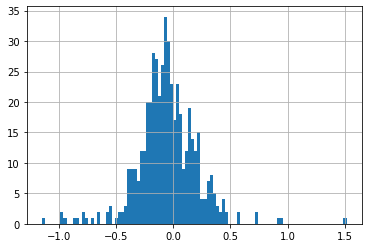

In [31]:
hy_cy_swh_df['diff'].hist(bins = 100)

In [32]:
hy_alt = HaiYangData(satellite='hy', sensor='alt',resolution=resolution)

hy_x_map, hy_y_map = hy_alt.get_map_grid(transformer_back)

hy_cy_swh_draw_diff_grid = hy_alt.get_nan_grid(hy_alt.nlat, hy_alt.nlon)
for i in range(hy_cy_swh_df.shape[0]):
    hy_cy_swh_draw_diff_grid[int(hy_cy_swh_df.iloc[i].ij.split('+')[0])][int(hy_cy_swh_df.iloc[i].ij.split('+')[1])] = hy_cy_swh_df.iloc[i]['diff']


<ipython-input-21-24430fa1c0e5>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  m.pcolormesh(x_map, y_map, data=grid, cmap=cmap,vmin=vmin, vmax=vmax,latlon = True)


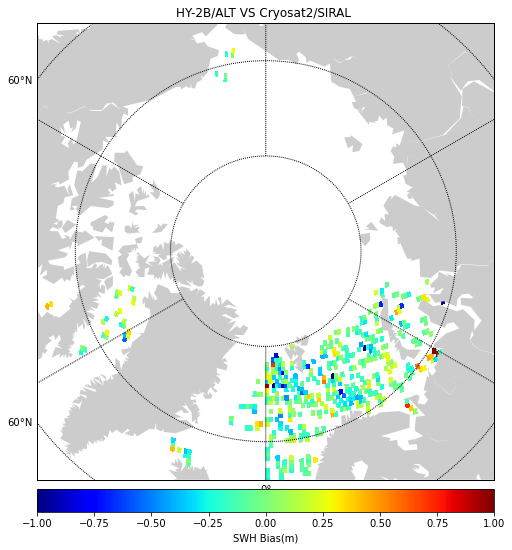

In [33]:
plt.figure(figsize=(9, 9))
polar_plot(hy_x_map, hy_y_map,hy_cy_swh_draw_diff_grid,vmax=1, vmin = -1,color_lable='SWH Bias(m)',title='HY-2B/ALT VS Cryosat2/SIRAL ')
plt.savefig(r'output_50km/'+ str(years) + str(months)  +'HY & CY' + 'swh' +' '+ 'location_plot.jpg',bbox_inches='tight', dpi=300)

# 读取处理HY2/ALT&CRYOSAT2/SIRAL SSH对比结果

In [29]:
hy_cy_ssh_files = glob.glob(dataframe_dir + 'HY&CY ssh*.csv')
hy_cy_ssh_files.sort()

hy_cy_ssh_df= pd.DataFrame(columns = ['ij','hy_time_round','other_time_round','hy_time','hy_value','other_time','other_value','diff'])
for f in hy_cy_ssh_files:
    hy_cy_ssh_df = pd.concat([hy_cy_ssh_df,(pd.read_csv(f))])

In [30]:
hy_cy_ssh_df = hy_cy_ssh_df.drop(hy_cy_ssh_df[hy_cy_ssh_df['diff'] > hy_cy_ssh_df['diff'].std() * 5 ].index)
hy_cy_ssh_df = hy_cy_ssh_df.drop(hy_cy_ssh_df[hy_cy_ssh_df['diff'] < np.negative(hy_cy_ssh_df['diff'].std() * 5) ].index)

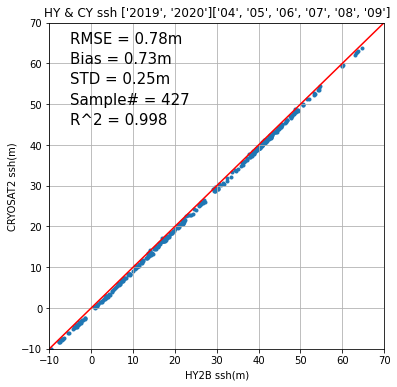

In [32]:
plt.figure(figsize=(6, 6))
plt.scatter(hy_cy_ssh_df['hy_value'], hy_cy_ssh_df['other_value'], marker='.')
plt.plot(np.linspace(-10,70),np.linspace(-10,70),color='r')
x_tick = range(-10,71,10)
plt.xticks(x_tick)
plt.yticks(x_tick)
plt.xlim(-10,70)
plt.ylim(-10,70)
plt.grid(True)
plt.text(-5, 65,'RMSE = ' + str(round(np.sqrt(mean_squared_error(hy_cy_ssh_df['hy_value'], hy_cy_ssh_df['other_value'])),2))+ 'm',size = 15)
plt.text(-5, 60, 'Bias = '+str(round(hy_cy_ssh_df['diff'].mean(), 2)) + 'm' ,size = 15)
plt.text(-5, 55, 'STD = '+str(round(hy_cy_ssh_df['diff'].std(), 2))+ 'm',size = 15)
plt.text(-5, 50,'Sample# = ' + str(hy_cy_ssh_df.shape[0]),size = 15)
plt.text(-5, 45,'R^2 = ' + str(round(r2_score(hy_cy_ssh_df['hy_value'], hy_cy_ssh_df['other_value']),3)),size = 15)

plt.xlabel('HY2B ' + 'ssh' + '(m)')
plt.ylabel('CRYOSAT2 ' + 'ssh' + '(m)')
plt.title('HY & CY ssh '+str(years) + str(months) )
plt.savefig(output_dir+'scatter_plot\\HY & CY\\ssh\\'+ str( years) + str(months)  +'HY & CY' + 'ssh' +' '+ 'scatter_plot.jpg')

In [23]:
### 去除3倍std

In [24]:
hy_cy_ssh_df = hy_cy_ssh_df.drop(hy_cy_ssh_df[hy_cy_ssh_df['diff'] > hy_cy_ssh_df['diff'].std() * 3 ].index)
hy_cy_ssh_df = hy_cy_ssh_df.drop(hy_cy_ssh_df[hy_cy_ssh_df['diff'] < np.negative(hy_cy_ssh_df['diff'].std() * 3) ].index)


In [25]:
hy_cy_ssh_df.shape

(64, 8)

Text(0, 0.5, 'CRYOSAT2 ssh(m)')

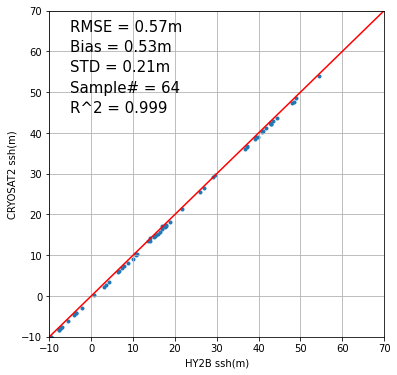

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(hy_cy_ssh_df['hy_value'], hy_cy_ssh_df['other_value'], marker='.')
plt.plot(np.linspace(-10,70),np.linspace(-10,70),color='r')
x_tick = range(-10,71,10)
plt.xticks(x_tick)
plt.yticks(x_tick)
plt.xlim(-10,70)
plt.ylim(-10,70)
plt.grid(True)
plt.text(-5, 65,'RMSE = ' + str(round(np.sqrt(mean_squared_error(hy_cy_ssh_df['hy_value'], hy_cy_ssh_df['other_value'])),2))+ 'm',size = 15)
plt.text(-5, 60, 'Bias = '+str(round(hy_cy_ssh_df['diff'].mean(), 2)) + 'm' ,size = 15)
plt.text(-5, 55, 'STD = '+str(round(hy_cy_ssh_df['diff'].std(), 2))+ 'm',size = 15)
plt.text(-5, 50,'Sample# = ' + str(hy_cy_ssh_df.shape[0]),size = 15)
plt.text(-5, 45,'R^2 = ' + str(round(r2_score(hy_cy_ssh_df['hy_value'], hy_cy_ssh_df['other_value']),3)),size = 15)

plt.xlabel('HY2B ' + 'ssh' + '(m)')
plt.ylabel('CRYOSAT2 ' + 'ssh' + '(m)')
# plt.title('HY & IS ssh '+str(years[0]) + str(months[0]) )
# plt.savefig(r'output/'+'2019-2020' +  str(months) +'HY & IS' + 'ssh' +' '+ 'scatter_plot.jpg')
# plt.savefig(r'output/'+ str( years) + str(months)  +'HY & IS' + 'ssh' +' '+ 'scatter_plot.jpg')

# 读取处理HY2/ALT&ICESAT/ATLAS SWH对比结果

In [34]:
hy_cy_swh_files = glob.glob(dataframe_dir + 'HY&IS swh*.csv')
hy_cy_swh_files.sort()

In [35]:
hy_cy_swh_df= pd.DataFrame(columns = ['ij','hy_time_round','other_time_round','hy_time','hy_value','other_time','other_value','diff'])
for f in hy_cy_swh_files:
    hy_cy_swh_df = pd.concat([hy_cy_swh_df,(pd.read_csv(f))])


In [36]:
hy_cy_swh_df

,ij,hy_time_round,other_time_round,hy_time,hy_value,other_time,other_value,diff
0,146+0,169087,169086,6.087149e+08,2.527500,6.087115e+08,2.503970,0.023530
1,147+0,169087,169086,6.087149e+08,2.568889,6.087115e+08,2.427783,0.141106
2,148+0,169087,169086,6.087149e+08,2.557286,6.087116e+08,2.520176,0.037110
3,148+12,169038,169037,6.085394e+08,1.346000,6.085362e+08,1.073749,0.272251
4,149+-18,168824,168824,6.077685e+08,1.281333,6.077668e+08,1.148652,0.132682
...,...,...,...,...,...,...,...,...
13,220+50,180647,180646,6.503302e+08,-4.370160,6.503273e+08,-4.943400,0.573240
14,220+51,180647,180646,6.503302e+08,-4.956525,6.503273e+08,-5.201876,0.245351
15,235+29,180645,180644,6.503240e+08,1.769580,6.503217e+08,0.941330,0.828250
16,235+30,180645,180644,6.503240e+08,1.863000,6.503217e+08,1.130471,0.732529


In [37]:
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['hy_value'] < 0].index)
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['other_value'] < 0].index)


In [38]:

hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['hy_value'] > 20].index)
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['other_value'] > 20].index)


In [39]:
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['diff'] > hy_cy_swh_df['diff'].std() * 3 ].index)
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['diff'] < np.negative(hy_cy_swh_df['diff'].std() * 3) ].index)


In [40]:
hy_cy_swh_df.other_value.max()

12.308113098144533

In [41]:
r2_score(hy_cy_swh_df['hy_value'], hy_cy_swh_df['other_value'])

0.7197997190447656

In [42]:
hy_cy_swh_df['hy_value'].corr(hy_cy_swh_df['other_value'])

0.8649031216340692

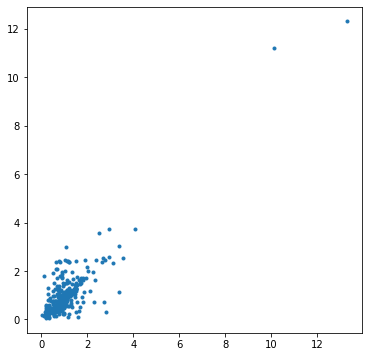

In [43]:
plt.figure(figsize=(6, 6))
plt.scatter(hy_cy_swh_df['hy_value'], hy_cy_swh_df['other_value'], marker='.')


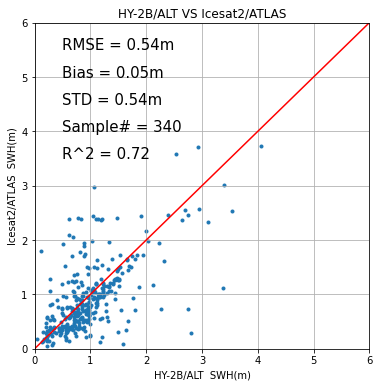

In [45]:
plt.figure(figsize=(6, 6))
plt.scatter(hy_cy_swh_df['hy_value'], hy_cy_swh_df['other_value'], marker='.')
plt.plot(np.linspace(0,6),np.linspace(0,6),color='r')
x_tick = range(0,7,1)
plt.xticks(x_tick)
plt.yticks(x_tick)
plt.xlim(0,6)
plt.ylim(0,6)
plt.grid(True)
plt.text(0.5, 5.5,'RMSE = ' + str(round(np.sqrt(mean_squared_error(hy_cy_swh_df['hy_value'], hy_cy_swh_df['other_value'])),2))+ 'm',size = 15)
plt.text(0.5, 5, 'Bias = '+str(round(hy_cy_swh_df['diff'].mean(), 2)) + 'm' ,size = 15)
plt.text(0.5, 4.5, 'STD = '+str(round(hy_cy_swh_df['diff'].std(), 2))+ 'm',size = 15)
plt.text(0.5, 4,'Sample# = ' + str(hy_cy_swh_df.shape[0]),size = 15)
# plt.text(0.5,3.5,'R = ' + str(round(hy_cy_swh_df['hy_value'].corr(hy_cy_swh_df['other_value']),3)),size = 15)

plt.text(0.5,3.5,'R^2 = ' + str(round(r2_score(hy_cy_swh_df['hy_value'], hy_cy_swh_df['other_value']),3)),size = 15)
# plt.text(0.5,3.5,'R^2 = ' + str(round(hy_cy_swh_df['hy_value'].corr(hy_cy_swh_df['other_value']),3)),size = 15)

plt.xlabel('HY-2B/ALT ' + ' SWH' + '(m)')
plt.ylabel('Icesat2/ATLAS ' + ' SWH' + '(m)')
plt.title('HY-2B/ALT VS Icesat2/ATLAS' )

# plt.savefig(r'output/'+'2019-2020' +  str(months) +'HY & IS' + 'swh' +' '+ 'scatter_plot.jpg')
plt.savefig(r'output_25km/'+ str( years) + str(months)  +'HY & IS' + 'swh' +' '+ 'scatter_plot.jpg',bbox_inches='tight', dpi=300)

In [46]:
hy_alt = HaiYangData(satellite='hy', sensor='alt',resolution=resolution)

hy_x_map, hy_y_map = hy_alt.get_map_grid(transformer_back)

hy_cy_swh_draw_diff_grid = hy_alt.get_nan_grid(hy_alt.nlat, hy_alt.nlon)
for i in range(hy_cy_swh_df.shape[0]):
    hy_cy_swh_draw_diff_grid[int(hy_cy_swh_df.iloc[i].ij.split('+')[0])][int(hy_cy_swh_df.iloc[i].ij.split('+')[1])] = hy_cy_swh_df.iloc[i]['diff']


<ipython-input-21-24430fa1c0e5>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  m.pcolormesh(x_map, y_map, data=grid, cmap=cmap,vmin=vmin, vmax=vmax,latlon = True)


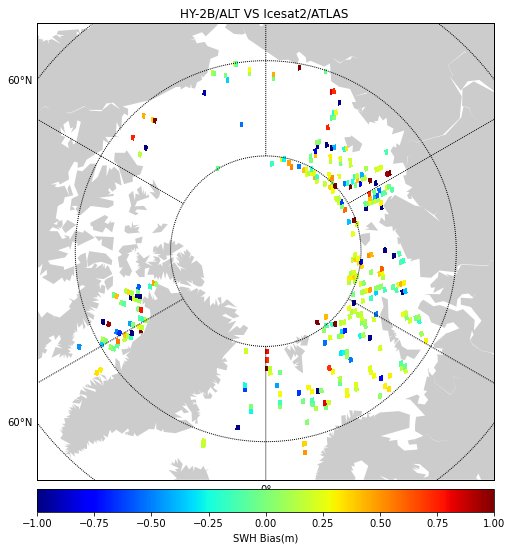

In [47]:
plt.figure(figsize=(9, 9))
polar_plot(hy_x_map, hy_y_map,hy_cy_swh_draw_diff_grid,vmax=1, vmin = -1,color_lable='SWH Bias(m)',title='HY-2B/ALT VS Icesat2/ATLAS ')
plt.savefig(r'output_25km/'+ str(years) + str(months)  +'HY & IS' + 'swh' +' '+ 'location_plot.jpg',bbox_inches='tight', dpi=300)

# 读取处理HY2/ALT&ICESAT/ATLAS SSH对比结果

In [25]:
hy_cy_swh_files = glob.glob(dataframe_dir + 'HY&IS ssh*.csv')
hy_cy_swh_files.sort()

In [26]:
hy_cy_swh_df= pd.DataFrame(columns = ['ij','hy_time_round','other_time_round','hy_time','hy_value','other_time','other_value','diff'])
for f in hy_cy_swh_files:
    hy_cy_swh_df = pd.concat([hy_cy_swh_df,(pd.read_csv(f))])


In [27]:
hy_cy_swh_df.shape

(283, 8)

hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['hy_value'] < 0].index)
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['other_value'] < 0].index)


hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['diff'] > hy_cy_swh_df['diff'].std() * 3 ].index)
hy_cy_swh_df = hy_cy_swh_df.drop(hy_cy_swh_df[hy_cy_swh_df['diff'] < np.negative(hy_cy_swh_df['diff'].std() * 3) ].index)


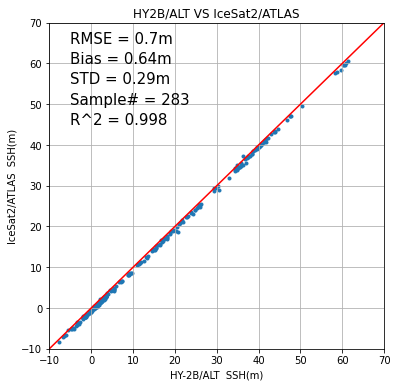

In [28]:
plt.figure(figsize=(6, 6))
plt.scatter(hy_cy_swh_df['hy_value'], hy_cy_swh_df['other_value'], marker='.')
plt.plot(np.linspace(-10,70),np.linspace(-10,70),color='r')
x_tick = range(-10,71,10)
plt.xticks(x_tick)
plt.yticks(x_tick)
plt.xlim(-10,70)
plt.ylim(-10,70)
plt.grid(True)
plt.text(-5, 65,'RMSE = ' + str(round(np.sqrt(mean_squared_error(hy_cy_swh_df['hy_value'], hy_cy_swh_df['other_value'])),2))+ 'm',size = 15)
plt.text(-5, 60, 'Bias = '+str(round(hy_cy_swh_df['diff'].mean(), 2)) + 'm' ,size = 15)
plt.text(-5, 55, 'STD = '+str(round(hy_cy_swh_df['diff'].std(), 2))+ 'm',size = 15)
plt.text(-5, 50,'Sample# = ' + str(hy_cy_swh_df.shape[0]),size = 15)
plt.text(-5, 45,'R^2 = ' + str(round(r2_score(hy_cy_swh_df['hy_value'], hy_cy_swh_df['other_value']),3)),size = 15)

plt.xlabel('HY-2B/ALT ' + ' SSH' + '(m)')
plt.ylabel('IceSat2/ATLAS ' + ' SSH' + '(m)')
plt.title('HY2B/ALT VS IceSat2/ATLAS' )

plt.savefig(r'output_25km/'+ str( years) + str(months)  +'HY & IS' + 'ssh' +' '+ 'scatter_plot.jpg',bbox_inches='tight', dpi=300)

In [29]:
hy_alt = HaiYangData(satellite='hy', sensor='alt',resolution=resolution)

hy_x_map, hy_y_map = hy_alt.get_map_grid(transformer_back)

hy_cy_swh_draw_diff_grid = hy_alt.get_nan_grid(hy_alt.nlat, hy_alt.nlon)
for i in range(hy_cy_swh_df.shape[0]):
    hy_cy_swh_draw_diff_grid[int(hy_cy_swh_df.iloc[i].ij.split('+')[0])][int(hy_cy_swh_df.iloc[i].ij.split('+')[1])] = hy_cy_swh_df.iloc[i]['diff']


<ipython-input-4-24430fa1c0e5>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  m.pcolormesh(x_map, y_map, data=grid, cmap=cmap,vmin=vmin, vmax=vmax,latlon = True)


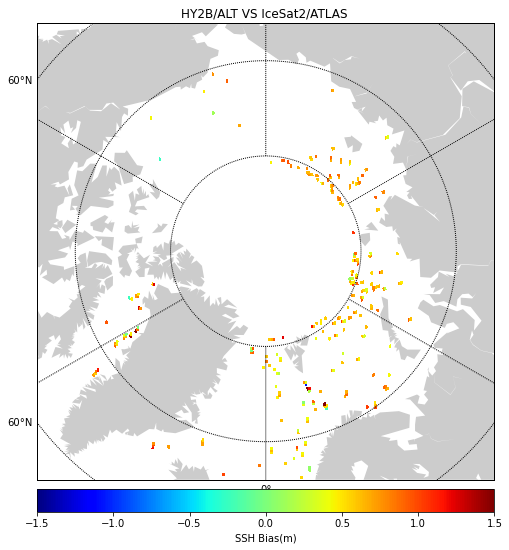

In [30]:
plt.figure(figsize=(9, 9))
polar_plot(hy_x_map, hy_y_map,hy_cy_swh_draw_diff_grid,vmax=1.5, vmin = -1.5,color_lable='SSH Bias(m)',title='HY2B/ALT VS IceSat2/ATLAS ')
plt.savefig(r'output_25km/'+ str(years) + str(months)  +'HY & IS' + 'ssh' +' '+ 'location_plot.jpg',bbox_inches='tight', dpi=300)